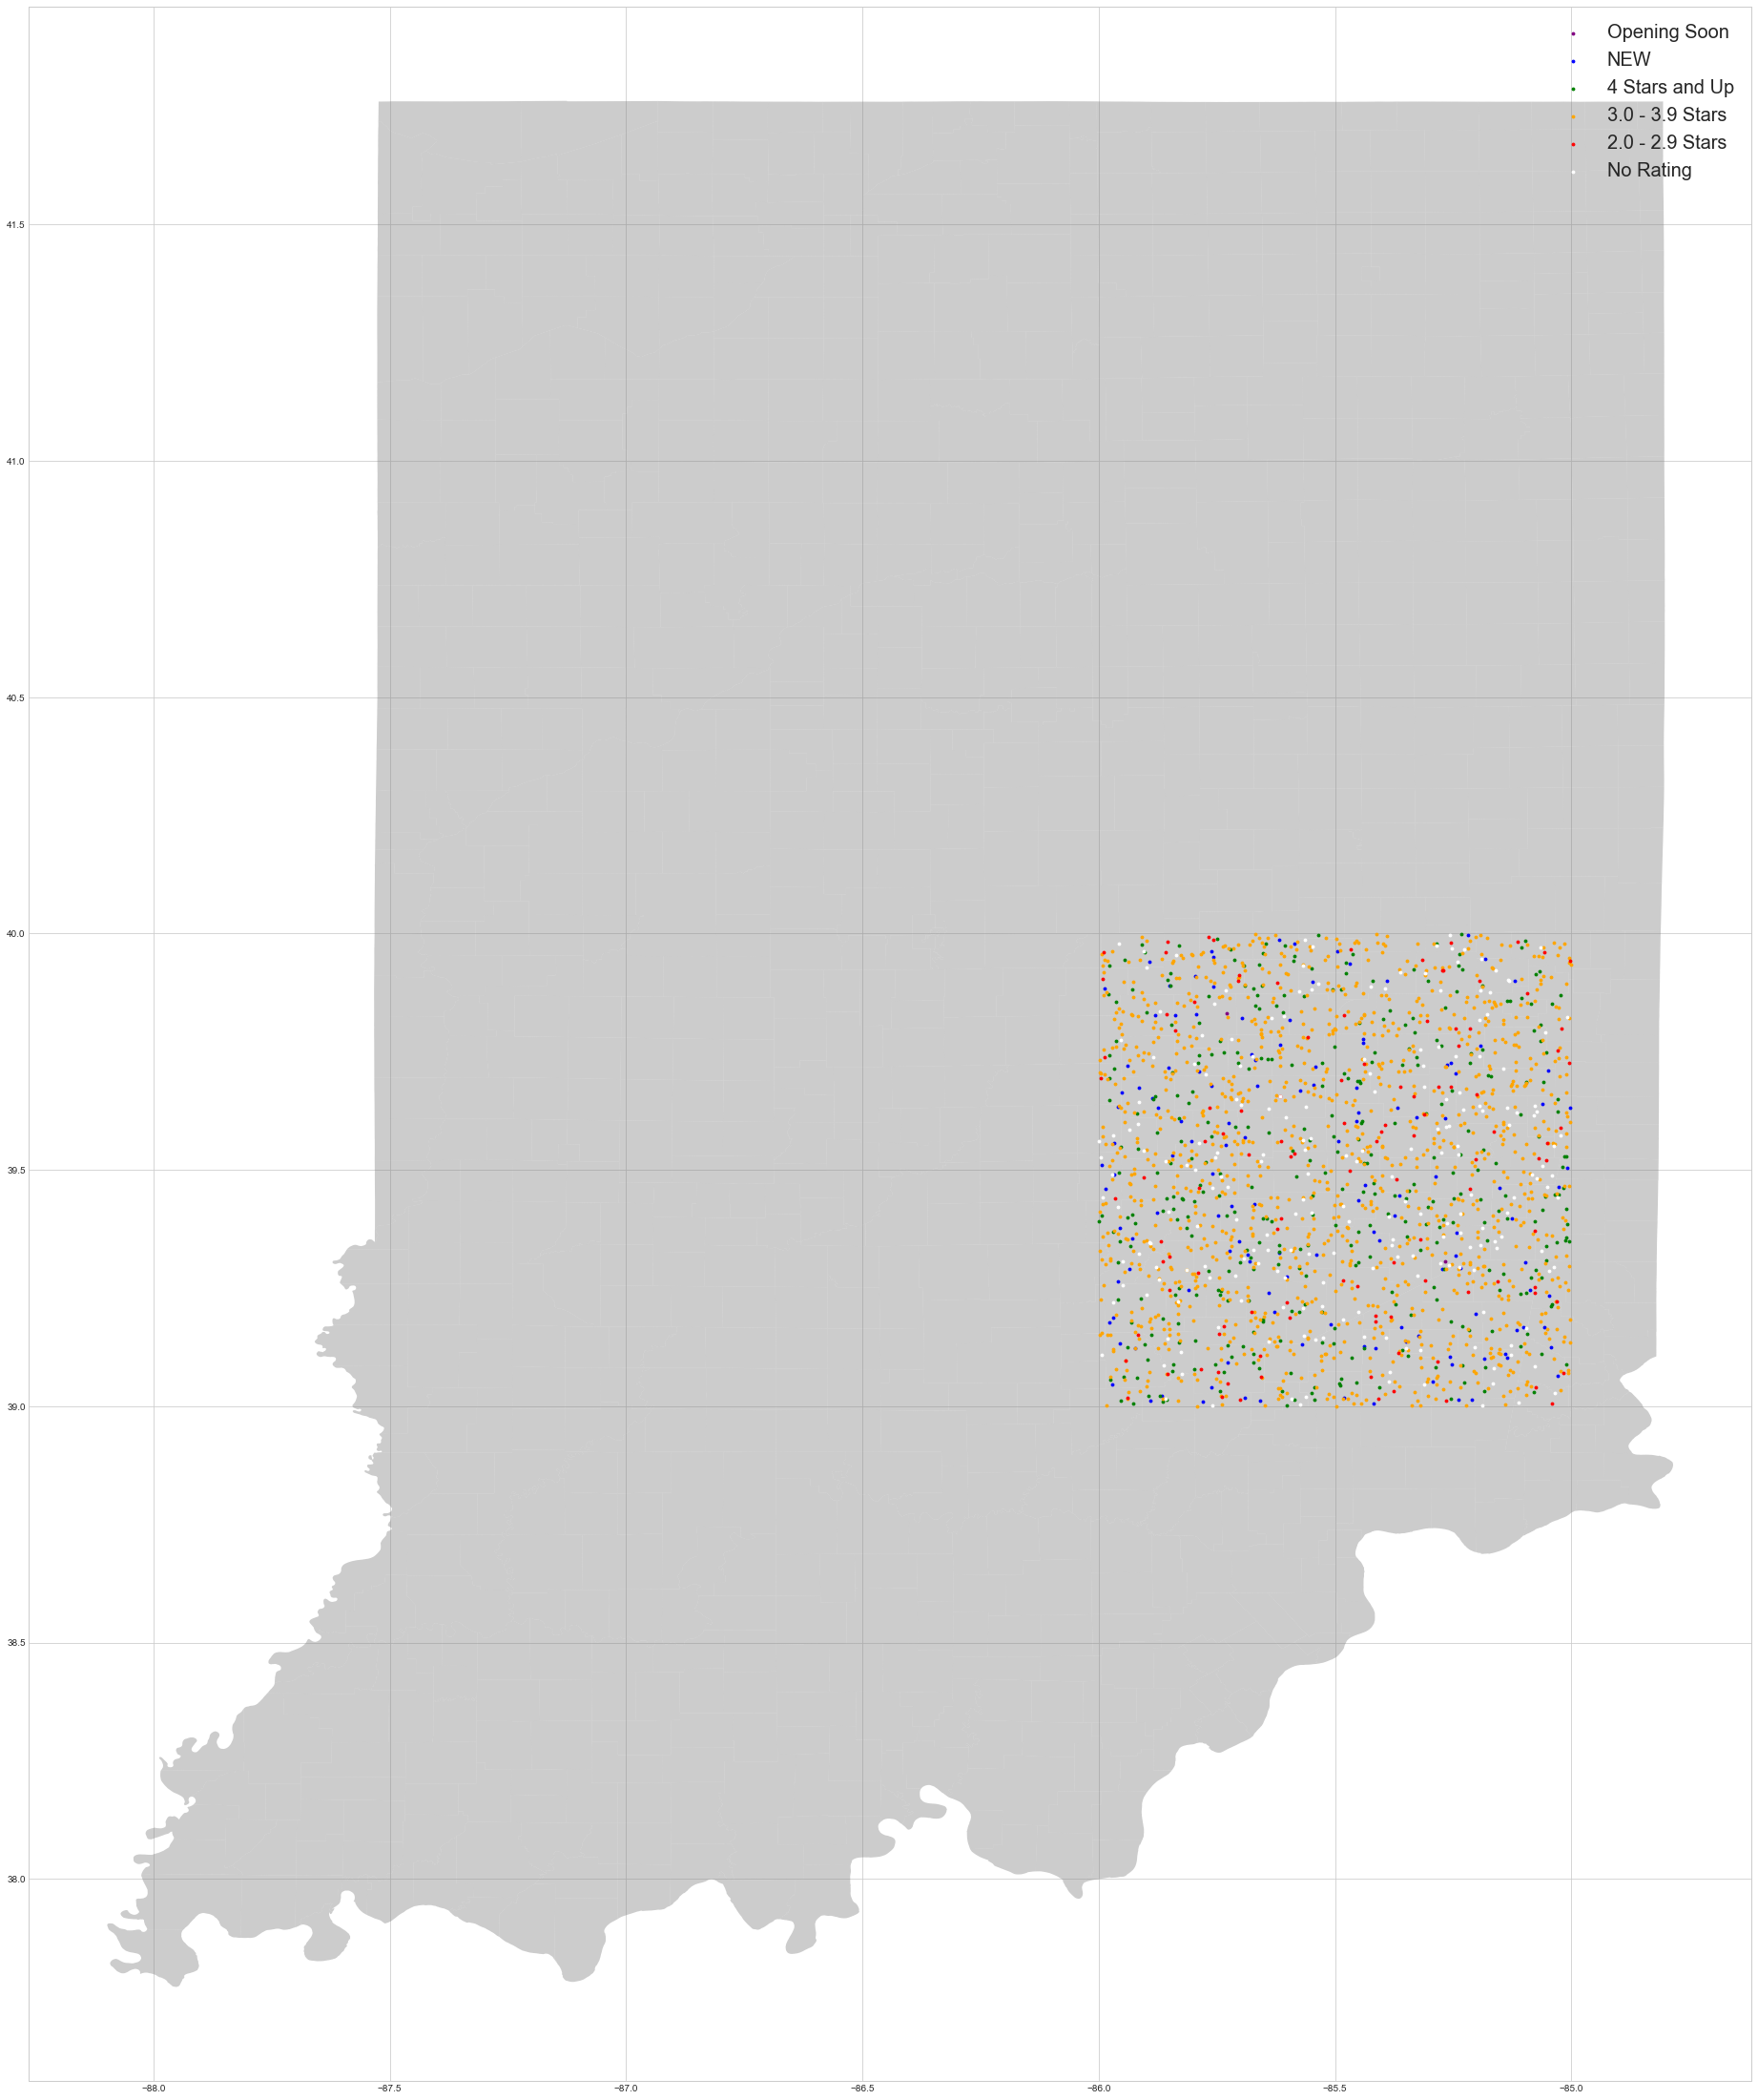

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import operator
import csv

#reference: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

%matplotlib inline

map = gpd.read_file('./tl_2017_18_cousub/tl_2017_18_cousub.shp')

fig,ax = plt.subplots(figsize = (40,40))
map.plot(ax = ax, alpha = 0.4, color = "grey")


csv = pd.read_csv('2020-XTern-DS.csv', sep=',')
csv = csv.sort_values(by=['Rating'], ascending=False)
crs = {'init': 'epsg:4326'}

geometry = [Point(xy) for xy in zip(csv["Longitude"], csv["Latitude"])]

geo_csv = gpd.GeoDataFrame(csv, crs = crs, geometry = geometry)

index = 0
for i in geo_csv.itertuples():
    if i.Rating == 'Opening Soon':
        lastOpen = index + 1
    elif i.Rating == 'NEW':
        lastNew = index + 1
    elif i.Rating == '-':
        lastDash = index + 1
    elif float(i.Rating) >= 4.0:
        last4 = index + 1
    elif float(i.Rating) >= 3.0:
        last3 = index + 1
    elif float(i.Rating) >= 2.0:
        last2 = index + 1
    index += 1    

geo_csv[0:lastOpen].plot(ax = ax, markersize = 8, color = "purple", marker = "o", label = "Opening Soon")
geo_csv[lastOpen:lastNew].plot(ax = ax, markersize = 8, color = "blue", marker = "o", label = "NEW")
geo_csv[lastNew:last4].plot(ax = ax, markersize = 8, color = "green", marker = "o", label = "4 Stars and Up")
geo_csv[last4:last3].plot(ax = ax, markersize = 8, color = "orange", marker = "o", label = "3.0 - 3.9 Stars")
geo_csv[last3:last2].plot(ax = ax, markersize = 8, color = "red", marker = "o", label = "2.0 - 2.9 Stars")
geo_csv[last2:lastDash].plot(ax = ax, markersize = 8, color = "white", marker = "o", label = "No Rating")
plt.legend(prop = {'size':20})



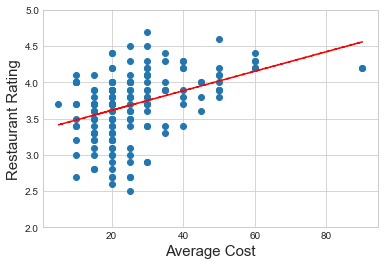

In [285]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

#reference: https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
#reference: https://towardsdatascience.com/making-plots-in-jupyter-notebook-beautiful-more-meaningful-23c8a35c0d5d

x = []
y = []
for i in geo_csv.itertuples():
    if i.Rating != 'Opening Soon' and i.Rating != '-' and i.Rating != 'NEW':
        y.append(float(i.Rating))
        x.append(float(i.Average_Cost[1:]))

plt.ylabel('Restaurant Rating', fontsize=15)
plt.xlabel('Average Cost', fontsize=15)
plt.ylim(2, 5)

linedata = np.polyfit(x, y, 1)
line = np.poly1d(linedata)
plt.plot(x,line(x),"r--")

plt.scatter(x,y)


184


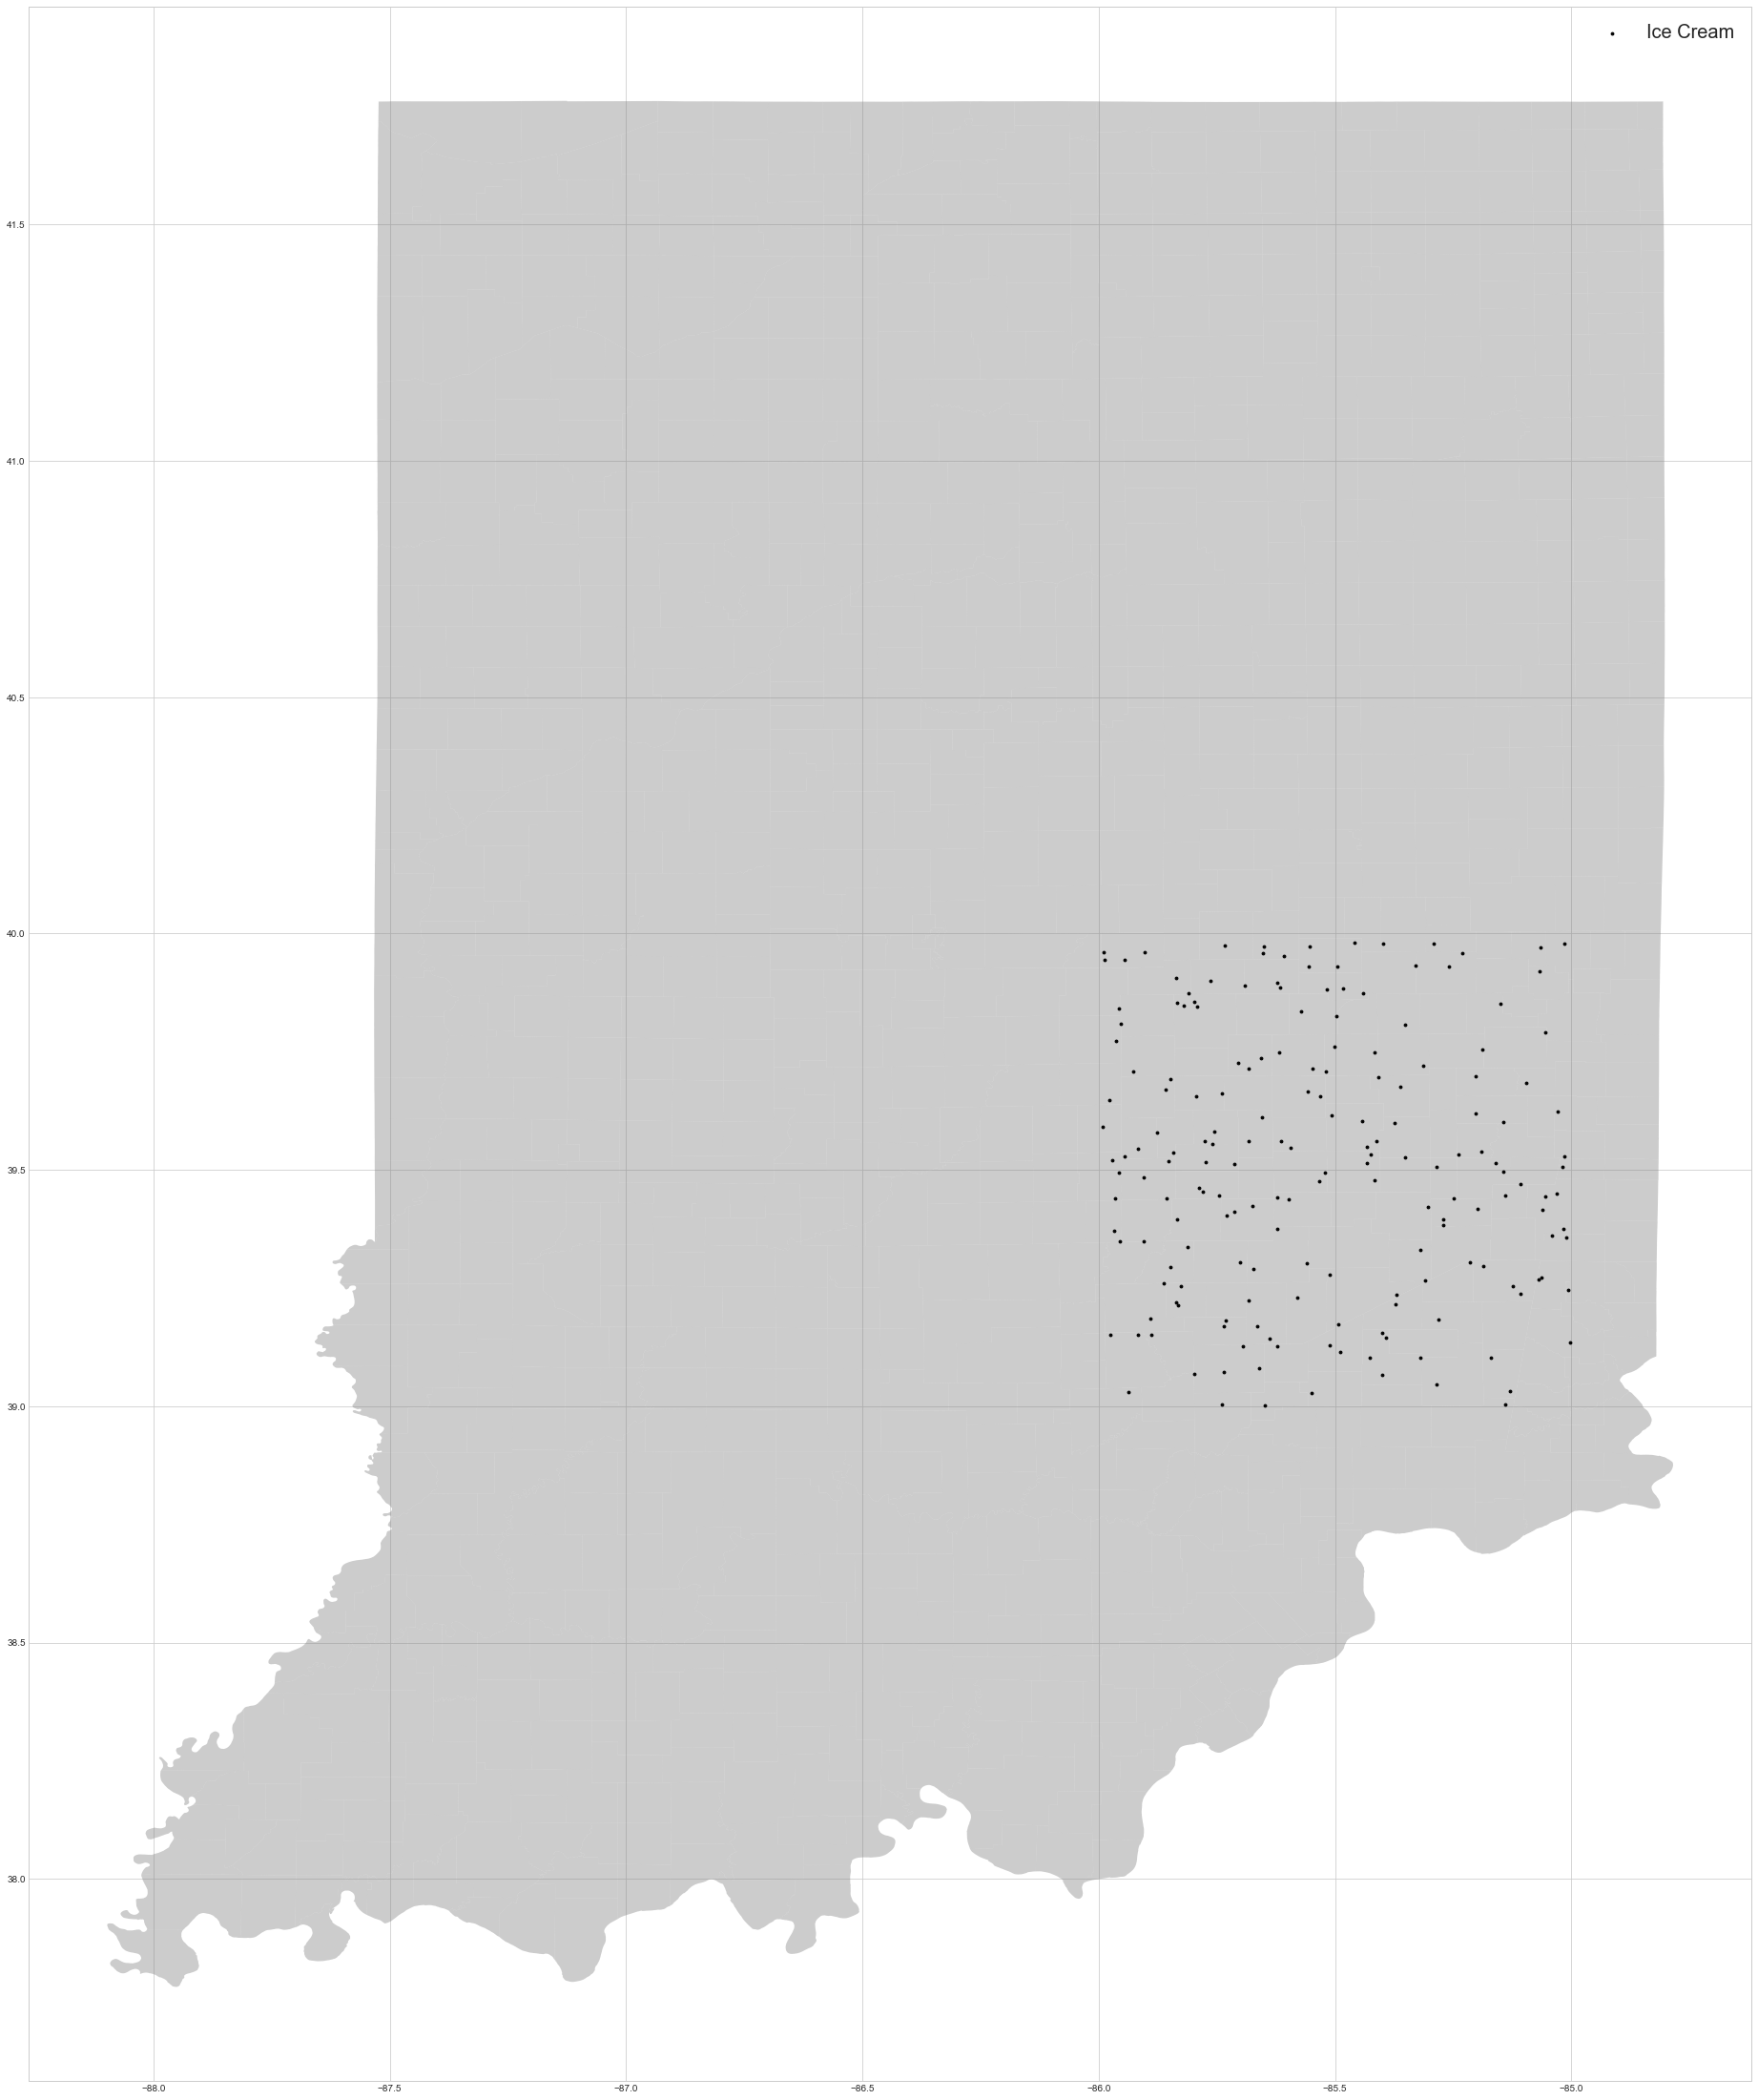

In [270]:
datalist = []
longit = []
latit = []
map = gpd.read_file('./tl_2017_18_cousub/tl_2017_18_cousub.shp')

fig,ax = plt.subplots(figsize = (40,40))
map.plot(ax = ax, alpha = 0.4, color = "grey")

csv = pd.read_csv('2020-XTern-DS.csv', sep=',')

for i in csv.itertuples():
#    foods = i.Cuisines.split(", ")
#    for food in foods:
#        if food == "Ice Cream":
    if int(i.Cook_Time.split(" ")[0]) > 60:
        datalist.append(i)
        latit.append(i.Latitude)
        longit.append(i.Longitude)
print(len(datalist))
            
geometry = [Point(xy) for xy in zip(longit, latit)]

geo_csv = gpd.GeoDataFrame(datalist, crs = crs, geometry = geometry)

geo_csv.plot(ax = ax, markersize = 8, color = "black", marker = "o", label = "Ice Cream")

plt.legend(prop = {'size':20})

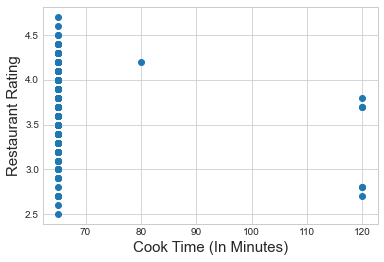

In [286]:
x = []
y = []
for i in geo_csv.itertuples():
    if i.Rating != 'Opening Soon' and i.Rating != '-' and i.Rating != 'NEW':
        y.append(float(i.Rating))
        x.append(int(i.Cook_Time.split(" ")[0]))

plt.ylabel('Restaurant Rating', fontsize=15)
plt.xlabel('Cook Time (In Minutes)', fontsize=15)


plt.scatter(x, y)

In [289]:
trend = []
for i in geo_csv.itertuples():
    if i.Rating != 'Opening Soon' and i.Rating != '-' and i.Rating != 'NEW':
        if float(i.Rating) >= 4.3 and float(i.Votes)>=500:
            trend.append(i.Restaurant)

print(trend)


['ID_7901', 'ID_8529', 'ID_6080', 'ID_5605', 'ID_1666', 'ID_2051', 'ID_3575', 'ID_6412', 'ID_567']
